<a href="https://colab.research.google.com/github/valsson-group/UNT-Chem3520/blob/main/Python/HydrogenRadialWaveFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp


In [3]:
def radial_wave_function(r,n,l):
  if (l >= n):
    print("l must be smaller than n")
    return
  laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
  rho = (2 * r) / n
  constant_factor = np.sqrt(
        ((2 / n) ** 3 * (sp.factorial(n - l - 1))) /
        (2 * n * (sp.factorial(n + l)))
  )
  return constant_factor * np.exp(-rho / 2) * (rho ** l) * laguerre(rho)

def get_radial_wave_function(n=1,l=0,num_points=1000,r_min=0,r_max=100):
  if (l >= n):
    print("l must be smaller than n")
    return
  r = np.linspace(r_min,r_max,num_points)
  radial_wf = radial_wave_function(r,n,l)
  radial_pdf = radial_wf**2*r**2
  return (r,radial_wf,radial_pdf)

def plot_radial_wf(n=1,l=0,r_max=10,Show_RadialWavefunction=True,Show_RadialDistributionFunction=True,SaveFig=False):
  (r,radial_wf,radial_pdf) = get_radial_wave_function(n,l,r_max=r_max)
  if Show_RadialWavefunction:
    plt.plot(r,radial_wf,linestyle="--",linewidth=3,color="red",label="R_({:d},{:d})(r)/(Z/a_0)".format(n,l))
  if Show_RadialDistributionFunction:
    plt.plot(r,radial_pdf,"-",color="blue",linewidth=3,label="P_({:d},{:d})(r)/(Z/a_0)".format(n,l))
  plt.axhline(0,color="black",linestyle="--")
  plt.legend()
  plt.title("Hydrogenic Atoms - Radial WF - n={:d}, l={:d}".format(n,l))
  plt.xlabel("Zr/a_0")
  plt.xlim([0,r_max])
  if SaveFig:
    plt.savefig("radial_n={:d}_l={:d}.png".format(n,l))

## Plotting of Radial WF and Radial Distribution Functions

This is that part where you can select different $n$ and $l$ values.
- The `r_max` variable determines the range of the $x$-axis, you will need to increase this for higher $n$ values.
- `Save_Figure` optiion allows to you to save the plot to a PNG file, you can the download the file by selecting the Folder tab on the left side.

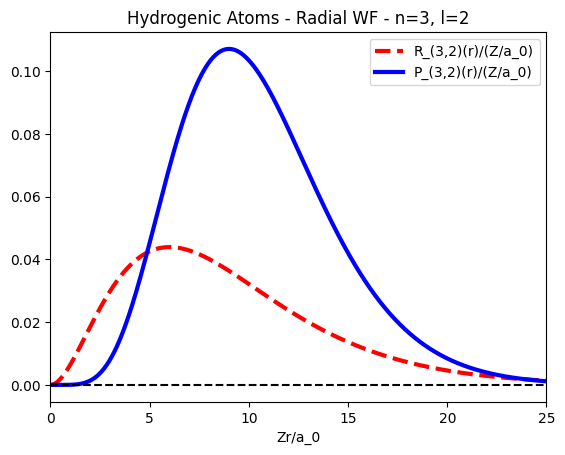

In [11]:
n=3 #@param {type:"integer"}
l=2 #@param {type:"integer"}
r_max=25 #@param {type:"integer"}
Show_RadialWavefunction=True #@param {type:"boolean"}
Show_RadialDistributionFunction=True #@param {type:"boolean"}
Save_Figure=True #@param {type:"boolean"}

plot_radial_wf(n,
               l,
               r_max,
               Show_RadialWavefunction=Show_RadialWavefunction,
               Show_RadialDistributionFunction=Show_RadialDistributionFunction,
               SaveFig=Save_Figure)
